In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lex = pd.read_csv('data.csv')

In [3]:
lex.drop(index=[0, 1, 2], inplace=True)

In [4]:
lex.reset_index(drop=True, inplace=True)

In [5]:
lex.columns = ['Date', 'Temperature']

In [6]:
lex.Date = lex.Date.astype(int)
lex.Temperature = lex.Temperature.astype(float)

In [7]:
lex.Date = lex.Date.floordiv(100)

In [8]:
lex.head()

,Date,Temperature
0,1895,28.2
1,1896,35.1
2,1897,29.8
3,1898,38.5
4,1899,34.5


In [9]:
X_train, X_test, y_train, y_test = train_test_split(lex.Date.values.reshape(-1, 1), lex.Temperature.values, random_state=11)

In [10]:
X_train.shape

(97, 1)

In [11]:
X_test.shape

(33, 1)

In [12]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [13]:
linear_regression.coef_

array([0.00379905])

In [14]:
linear_regression.intercept_

np.float64(26.720215220298016)

In [15]:
predicted = linear_regression.predict(X_test)

In [16]:
expected = y_test

In [17]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 33.92, expected: 28.20
predicted: 34.17, expected: 37.00
predicted: 34.21, expected: 36.50
predicted: 34.34, expected: 43.90
predicted: 34.37, expected: 27.80
predicted: 34.32, expected: 33.60
predicted: 34.00, expected: 35.50


In [18]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [19]:
predict(2019)

array([34.39048818])

In [20]:
predict(1890)

array([33.90041131])

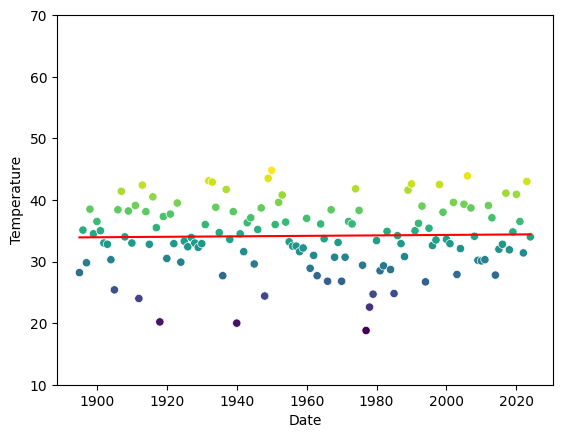

In [21]:
axes = sns.scatterplot(data=lex, x='Date', y='Temperature', hue='Temperature', palette='viridis', legend=False)
axes.set_ylim(10, 70)

x = np.array([min(lex.Date.values), max(lex.Date.values)])
y = predict(x)
line = plt.plot(x, y, color='red')
plt.show()

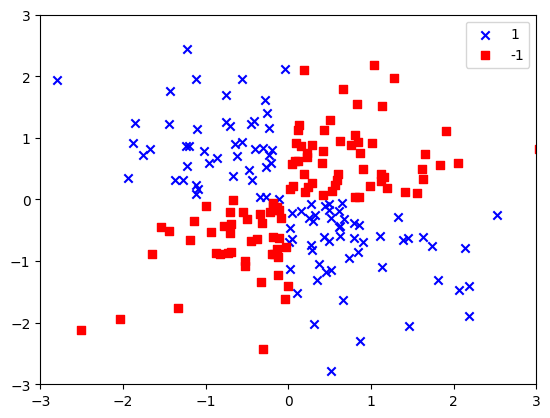

In [22]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

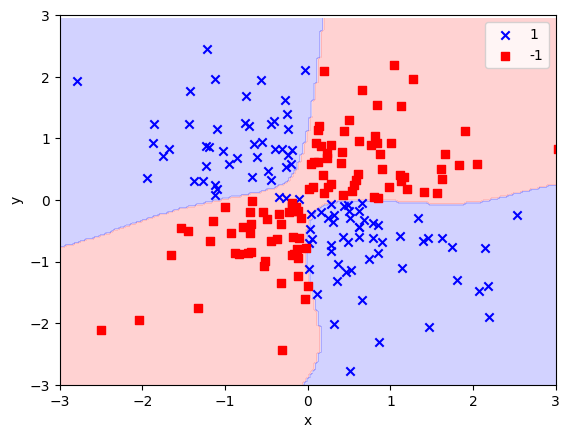

In [23]:
svm = SVC(C=10).fit(X_xor, y_xor)

x_min, x_max = X_xor[:, 0].min() - .5, X_xor[:, 0].max() + .5
y_min, y_max = X_xor[:, 1].min() - .5, X_xor[:, 1].max() + .5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.bwr_r)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

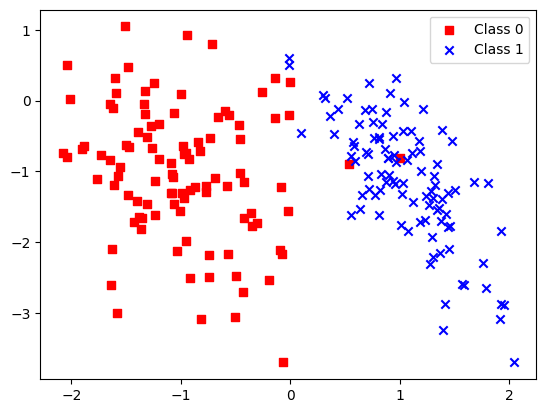

In [24]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=5)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='s', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='x', label='Class 1')
plt.legend()
plt.show()


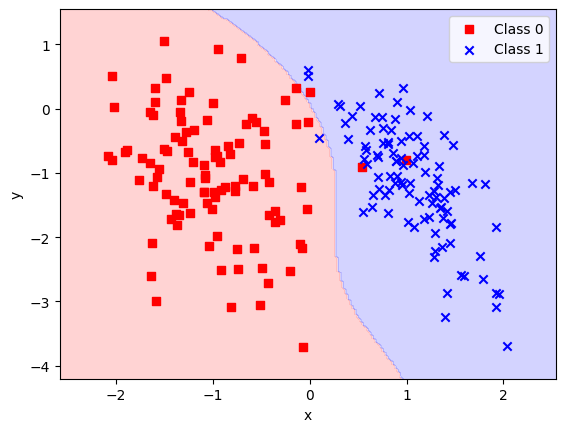

In [25]:
svm = SVC(C=10).fit(X, y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr_r')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='s', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='x', label='Class 1')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.legend()
plt.show()


==== KNN (k=5) ====
Accuracy: 0.9790
Precision: 0.9839
Recall: 0.9717
F1-score: 0.9772

==== SVC (RBF Kernel) ====
Accuracy: 0.9790
Precision: 0.9759
Recall: 0.9795
F1-score: 0.9776

==== GaussianNB ====
Accuracy: 0.9371
Precision: 0.9377
Recall: 0.9267
F1-score: 0.9317


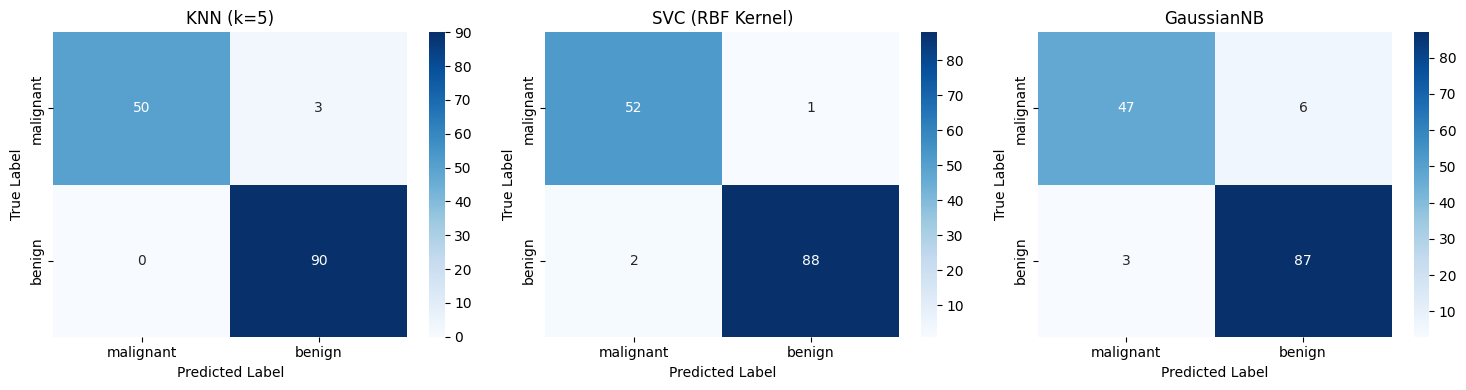

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVC (RBF Kernel)": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "GaussianNB": GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=cancer.target_names, output_dict=True)

    results[name] = {
        "accuracy": acc,
        "precision": report["macro avg"]["precision"],
        "recall": report["macro avg"]["recall"],
        "f1-score": report["macro avg"]["f1-score"],
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

for name, metrics in results.items():
    print(f"\n==== {name} ====")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1-score']:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, metrics) in zip(axes, results.items()):
    sns.heatmap(metrics["confusion_matrix"], annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
    ax.set_title(name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()